# A. Random Forest 

## A.1 Regression

**RFR stands for Random Forest Regression, which is a type of ensemble learning method used for regression tasks.** The main idea behind random forest regression is to train multiple decision trees on random subsets of the data and then average the predictions made by these trees to obtain the final prediction.

Each decision tree in the random forest is trained using a random subset of the data, and each tree is allowed to grow to its maximum size, which results in a set of high-variance trees. The final prediction is obtained by averaging the predictions made by all the trees, which reduces the variance of the prediction and makes the random forest regression more robust to overfitting.

Random forest regression can be used for a wide range of applications, including predicting numerical values such as sales revenue, stock prices, or temperatures. The method is simple to implement, fast, and provides good results for many real-world problems.

**The following are the most commonly used parameters in RandomForestRegressor class of scikit-learn library:**

n_estimators: The number of trees in the forest. The larger the number of trees, the better the model performance, but also the longer the training time.

criterion: The function to measure the quality of a split. The default is "mse" (mean squared error).

max_depth: The maximum depth of the tree. If None, the nodes are expanded until all the leaves contain less than min_samples_split samples.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

max_features: The number of features to consider when looking for the best split.

random_state: The seed of the pseudorandom number generator used when shuffling the data to choose the samples for each tree.

n_jobs: The number of jobs to run in parallel. -1 means using all processors.

Note that these are just a subset of the parameters available in the RandomForestRegressor class. You can refer to the scikit-learn documentation for a complete list of parameters: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

In [94]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california_housing = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

# Split the data into features and target
features = california_housing.drop(["median_house_value"], axis=1)
target = california_housing["median_house_value"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

In [95]:
# Train the RFR model
model = RandomForestRegressor(n_estimators=100,max_depth=8, random_state=0)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 3283767984.7080493
R2 Score: 0.7450212734023347


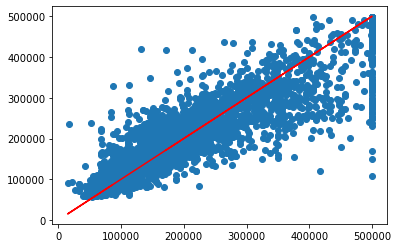

In [96]:
plt.scatter(y_test, y_pred)
plt.plot(y_test,y_test, color='red')

### GridSearch CV

In [97]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
california_housing = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv", sep=",")

# Split the data into features and target
features = california_housing.drop(["median_house_value"], axis=1)
target = california_housing["median_house_value"]

In [100]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# Define the hyperparameter grid
param_grid = {
              'max_depth': [2, 5],
              'min_samples_split': [2,5]
}

# Train the RFR model using Grid Search
model = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the mean squared error and R2 score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best hyperparameters:", model.best_params_)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Best hyperparameters: {'max_depth': 5, 'min_samples_split': 2}
Mean Squared Error: 4827152030.4762335
R2 Score: 0.6251802552567995


## A.2  Classification

In [107]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn import tree
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load the Breast Cancer Dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Arrange Data into Features Matrix and Target Vector
X = df.loc[:, df.columns != 'target']
y = df.loc[:, 'target'].values

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, y, random_state=0)

# Random Forests in `scikit-learn` (with N = 100)
rf = RandomForestClassifier(n_estimators=100,
                            random_state=0)
rf.fit(X_train, Y_train)

RandomForestClassifier(random_state=0)

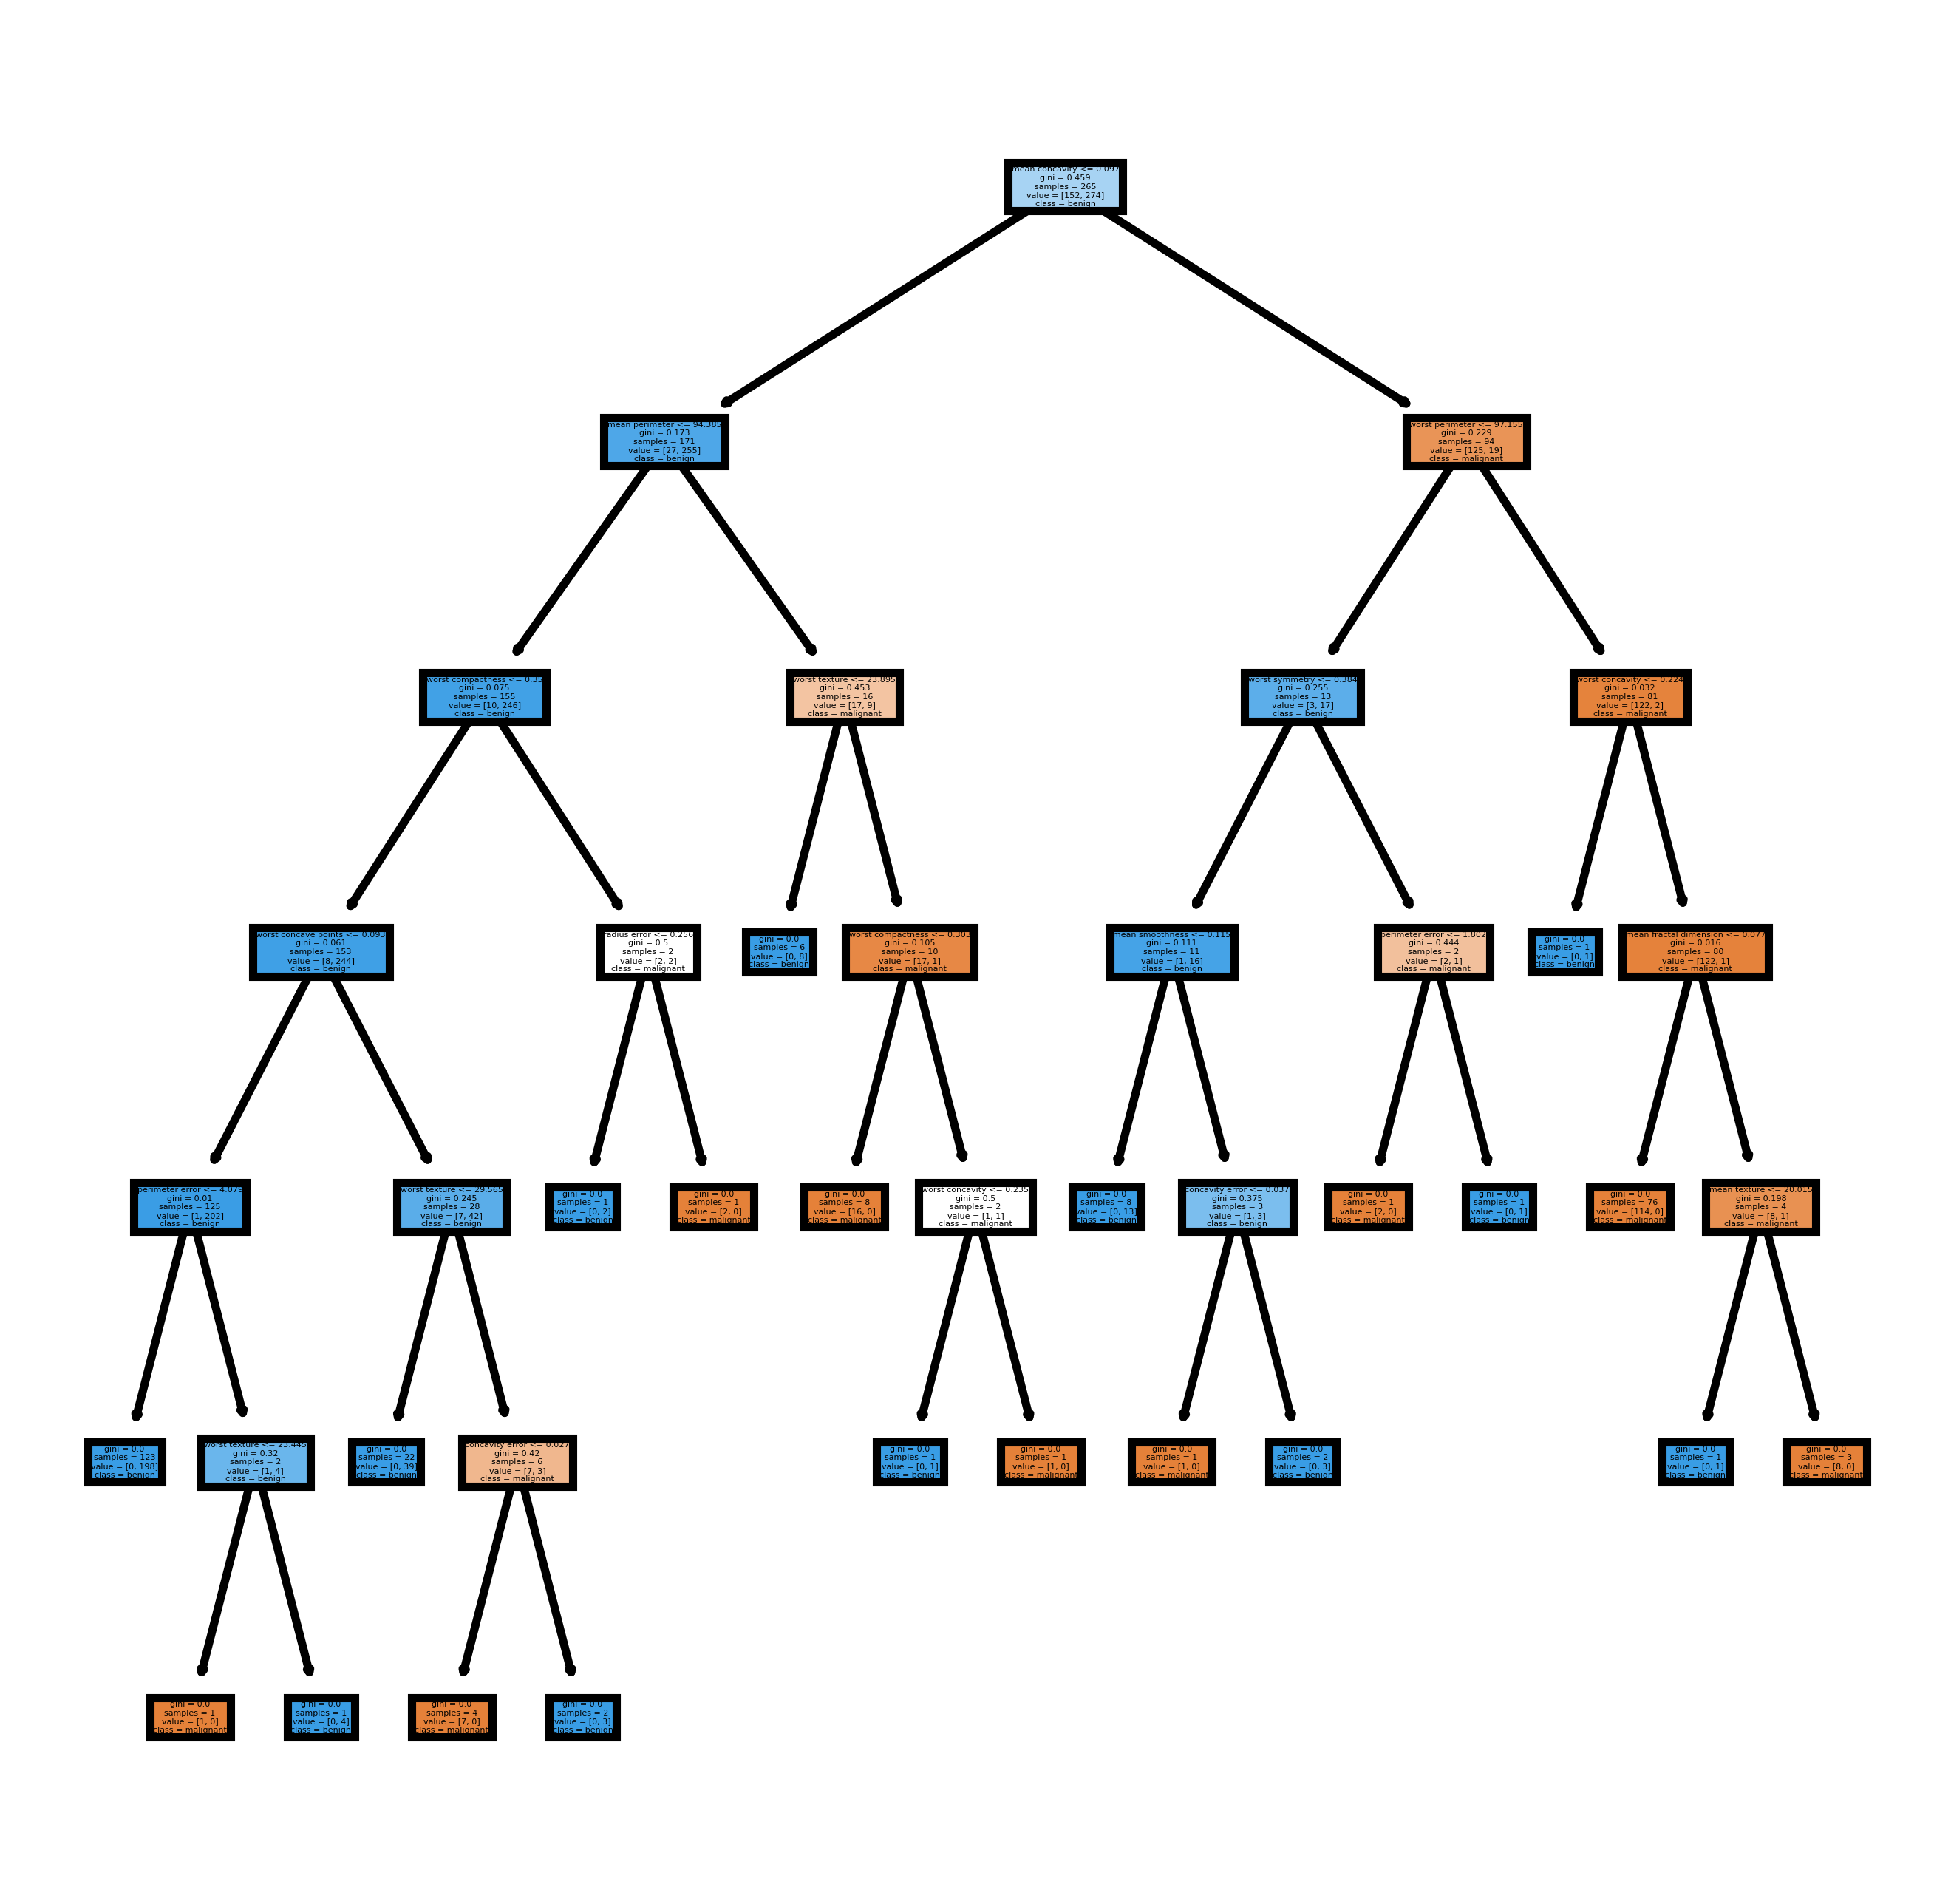

In [108]:
fn=data.feature_names
cn=data.target_names
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(rf.estimators_[0],
               feature_names = fn, 
               class_names=cn,
               filled = True);

# B. XGBOOST : Extreme Gradient Boosted Trees

**XGBoost is a machine learning algorithm that is used for supervised learning problems, such as classification and regression. It is a type of gradient boosting algorithm that builds an ensemble of decision trees to make predictions.**

Think of it like a game of 20 questions. XGBoost starts by asking simple questions that can quickly eliminate many options. As it goes along, it asks more complex questions to further narrow down the possibilities. In the end, the algorithm is able to make a prediction based on the answers to all of the questions.

In terms of performance, XGBoost has been shown to have good accuracy and run relatively fast compared to other machine learning algorithms, making it a popular choice for many data science competitions and real-world problems.

In simpler terms, XGBoost is a tool that helps you make predictions based on previous data, by building a model that "learns" from this data and makes decisions based on what it has learned.

**Gradient Boosting is a machine learning technique used for building predictive models. It works by combining multiple weak models to form a strong, more accurate model.**

Think of it like building a tower with blocks. Each block represents a weak model that makes a prediction. To make the tower stronger, you add more blocks on top of each other. Each new block is used to correct the mistakes made by the previous blocks, making the tower more accurate.

In Gradient Boosting, the weak models are typically decision trees, which are simple models that make predictions based on the values of the input variables. The algorithm starts by building a simple decision tree and then adds more decision trees one by one, using the gradient of the loss function to correct the mistakes made by the previous trees.

The end result is a strong model that makes highly accurate predictions, even when the input data has complex relationships or patterns. Gradient Boosting has been shown to perform well on a wide range of problems and is a popular choice for many data science competitions and real-world applications.

In simpler terms, Gradient Boosting is a way to build a prediction model by combining many simple models, each correcting the mistakes of the previous ones, until a highly accurate model is formed.

**XGBoost is a gradient boosting algorithm that uses decision trees as its base learner. It is an implementation of the gradient boosting framework for distributed and scalable learning.**

The algorithm works by combining multiple weak decision trees to form a strong model. Each tree in the ensemble is trained to correct the mistakes made by the previous trees. The training process involves minimizing a loss function that measures the difference between the predicted values and the actual values.

XGBoost uses a second-order gradient descent method, which is more efficient than traditional gradient descent methods, to update the parameters of the decision trees and minimize the loss function. The algorithm also uses a technique called regularization to prevent overfitting, which is when the model fits the training data too closely and performs poorly on new data.

In addition to its fast training and prediction speed, XGBoost is also known for its ability to handle large datasets, missing data, and imbalanced data, making it a popular choice for many real-world problems. The algorithm is also highly customizable, with many hyperparameters that can be tuned to achieve better performance.

Overall, the XGBoost algorithm works by combining many weak decision trees to form a strong model, using gradient boosting and efficient optimization techniques to minimize the loss and prevent overfitting.

###  California Housing

In [77]:
import xgboost as xgb
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

# Load the California Housing dataset
data = fetch_california_housing()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = data['target']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Convert the data into XGBoost's DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Define the XGBoost model's hyperparameters
params = {
    'objective': 'reg:squarederror',
    'max_depth': 3,
    'learning_rate': 0.4
}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Make predictions on the test set
y_pred = model.predict(dtest)

# Evaluate the model's performance
mse=np.mean((y_pred-y_test)**2)
print(mse)

0.35543499731902584


In [78]:
df=pd.DataFrame(data=np.vstack([y_test, y_pred])).T
df.columns=['test', 'pred']
df.tail()

,test,pred
4123,1.695,1.730058
4124,2.046,2.574150
4125,1.286,1.216987
4126,2.595,2.576162
4127,1.676,1.862879


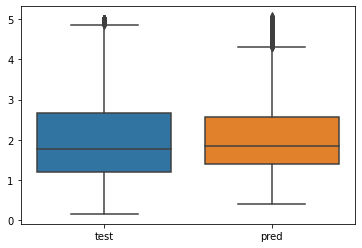

In [79]:
import seaborn as sns
sns.boxplot(data=df);

## Iris Data

In [39]:
import xgboost as xgb
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from xgboost import plot_tree

# Load the Iris dataset
X, y = load_iris(return_X_y=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Train an XGBoost model
model = xgb.XGBClassifier()
model.fit(X_train, y_train)

# Predict the class labels for the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
acc = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy: %.2f%%" % (acc * 100))

Accuracy: 96.67%


In [40]:
pd.DataFrame(data=np.vstack([y_test, y_pred]))

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0,2,0,0,0,1,1,0,1,0,...,2,0,0,1,0,1,2,1,2,1
1,0,2,0,0,0,1,1,0,1,0,...,2,0,0,1,0,1,2,1,2,1


# C.  ETR 

**Extra Trees Regression** is an ensemble learning method for regression problems that operates by training multiple decision tree models on random subsets of the input data and feature set. The final prediction is obtained by averaging the predictions of all the individual trees. It is an extension of the Random Forest Regression algorithm, where the trees in the forest are grown with maximum randomness. The main advantage of Extra Trees Regression is its ability to handle noisy or heterogeneous data and reduce overfitting.

**Extra Trees Regression** works by constructing a large number of decision trees on random subsets of the training data and features. During the training process, each tree is grown by randomly selecting a subset of the data and a subset of the features, and then fitting a decision tree model to that data. This results in a forest of trees, where each tree provides a prediction for the target variable.

**The following are the most commonly used parameters in ExtraTreesRegressor class of scikit-learn library:**

n_estimators: The number of trees in the forest. The larger the number of trees, the better the model performance, but also the longer the training time.

criterion: The function to measure the quality of a split. The default is "mse" (mean squared error).

max_depth: The maximum depth of the tree. If None, the nodes are expanded until all the leaves contain less than min_samples_split samples.

min_samples_split: The minimum number of samples required to split an internal node.

min_samples_leaf: The minimum number of samples required to be at a leaf node.

max_features: The number of features to consider when looking for the best split.

random_state: The seed of the pseudorandom number generator used when shuffling the data to choose the samples for each tree.

n_jobs: The number of jobs to run in parallel. -1 means using all processors.

Note that these are just a subset of the parameters available in the ExtraTreesRegressor class. You can refer to the scikit-learn documentation for a complete list of parameters: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html

In [102]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the California Housing dataset
data = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Split the data into features and target
features = data.drop("median_house_value", axis=1)
target = data["median_house_value"]

In [103]:
# Split the data into training and testing sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2)

# Train the Extra Trees Regressor
regressor = ExtraTreesRegressor(n_estimators=100, random_state=0)
regressor.fit(features_train, target_train)

# Predict the target for the test data
target_pred = regressor.predict(features_test)

# Calculate the mean squared error between the predicted and actual target values
mse = mean_squared_error(target_test, target_pred)
r2= r2_score(target_test, target_pred)
print("Mean Squared Error:", mse)
print("R squared", r2)

Mean Squared Error: 2928516540.479125
R squared 0.7794956206208186


In [105]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import plot_tree

# Load the California Housing dataset
data = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")

# Split the data into features and target
features = data.drop("median_house_value", axis=1)
target = data["median_house_value"]